In [1]:
import matplotlib.pyplot as plt
import os
import numpy as np
import scipy
import itertools
from scipy import linalg
import matplotlib as mpl

from sklearn import mixture
from gmm_lbd import *
%matplotlib inline




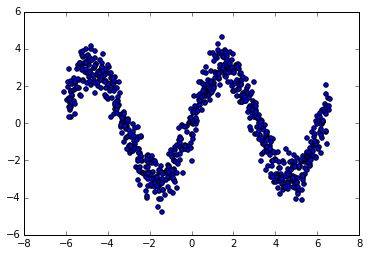

In [2]:

# Number of samples per component
n_samples = 800

# Generate random sample following a sine curve
np.random.seed(0)
X = np.zeros((n_samples, 2))

step = 4 * np.pi / n_samples

for i in xrange(X.shape[0]):
    x = i * step - 6
    X[i, 0] = x + np.random.normal(0, 0.1)
    X[i, 1] = 3 * (np.sin(x) + np.random.normal(0, .2))
    
plt.scatter(X[:,0],X[:,1])

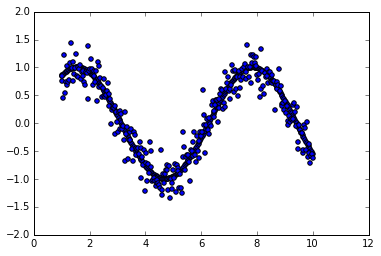

In [3]:
# Essay woth multiple dimension
n_samples = 300
np.random.seed(2)
Y = np.zeros((n_samples, 3))
Y [:,0] = np.linspace(1,10,n_samples)
step = 4 * np.pi / n_samples
for i in xrange(Y.shape[0]):   
    Y[i, 1] = np.sin(Y[i,0])
    Y[i, 2] = np.sin(Y[i,0]) + np.random.normal(0, .2)

    
plt.scatter(Y[:,0],Y[:,1])
plt.scatter(Y[:,0],Y[:,2])

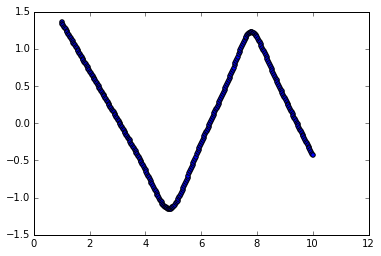

In [15]:
manager=GmmManager()
manager.add_dataset(Y)
manager.gen_gmm('0',n_components_range=[3])
gmm = manager.gmms['0']
z, _ = gmm.regression(Y[:,0])
plt.scatter(Y[:,0],z[:,0])


In [12]:
z.shape

AttributeError: 'tuple' object has no attribute 'shape'

In [17]:
sample = clf.sample(3000)
plt.scatter(sample[:, 0], sample[:, 1], color='red')
plt.scatter(X[:, 0], X[:, 1],0.3)


In [ ]:

plt.figure(figsize=(15, 5))
plot_ellipses(plt.gca(), clf)
plt.scatter(X[:, 0], X[:, 1])

        

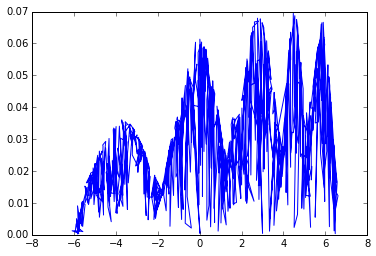

In [22]:
gmm.to_probability_density(X)
plt.plot(X[:,0],gmm.to_probability_density(X))


In [ ]:
manager = manager